In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
kcm_ridership = pd.read_csv("./Data/Trip_Data/Zon183Unsum.csv")

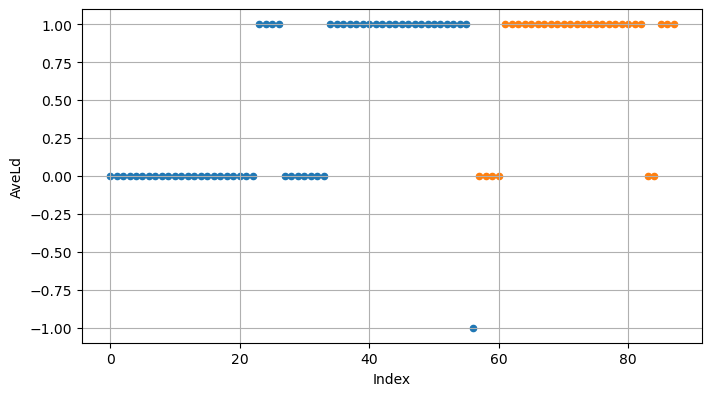

In [7]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Filter route and time period
route_data = kcm_ridership[(kcm_ridership['Route']==22) & (kcm_ridership['Period']=='AM')]

# Sort the trip data so that you end up with the stops in order
sorted_route = route_data.sort_values(by=['InOut','Trip_ID', 'STOP_SEQ', 'STOP_ID'])
sorted_route = sorted_route[['InOut','STOP_SEQ', 'STOP_ID', 'AveOn', 'AveOff', 'AveLd']]
sorted_route = sorted_route.drop_duplicates(subset=['InOut','STOP_SEQ'], keep='first')
sorted_route = sorted_route.reset_index(drop = True)
sorted_route['Index'] = sorted_route.index

passenger_mass = 80

fig, ax = plt.subplots(1, figsize = (8, 4.333))
sorted_route.loc[:, 'AveLd'] = sorted_route['AveLd']
sorted_route['diff'] = (sorted_route['AveOn'].round(0).astype(int)- sorted_route['AveOff'].round(0).astype(int))
sorted_route.loc[:, 'AveLd'] = sorted_route['diff'].cumsum()
inbound = sorted_route[sorted_route['InOut'] == 'I']
outbound = sorted_route[sorted_route['InOut'] == 'O']
#inbound.plot('Index', 'diff', ax=ax, kind='scatter', c='tab:cyan')
inbound.plot('Index', 'AveLd', ax=ax, kind='scatter', c='tab:blue')
#outbound.plot('Index', 'diff', ax=ax, kind='scatter', c='orange')
outbound.plot('Index', 'AveLd', ax=ax, kind='scatter', c='tab:orange')
ax.grid()

In [18]:
sorted_route

,InOut,STOP_SEQ,STOP_ID,AveOn,AveOff,AveLd,Index,diff
0,I,1.0,22264,0.0,0.0,0.0,0,0.0
1,I,2.0,22280,0.0,0.0,0.0,1,0.0
2,I,3.0,22290,0.0,0.0,0.0,2,0.0
3,I,4.0,22300,0.2,0.0,0.2,3,0.2
4,I,5.0,22320,0.0,0.0,0.2,4,0.0
5,I,6.0,22330,0.0,0.0,0.2,5,0.0
6,I,7.0,22340,0.1,0.0,0.2,6,0.1
7,I,8.0,22360,0.0,0.0,0.2,7,0.0
8,I,9.0,22370,0.0,0.0,0.2,8,0.0
9,I,10.0,22380,0.0,0.0,0.2,9,0.0


In [5]:
raw_acc_prof = pd.read_csv("./Data/Accel_Prof/acceleration.csv", names=['time[s]', 'accel.[g]'])

In [13]:
a_prof = raw_acc_prof.copy()
a_prof['accel.[m/s^2]'] = a_prof['accel.[g]'] * 9.81
a_prof = a_prof.drop(columns = ['accel.[g]'])

default_model = Bus_Model(a_prof)

In [14]:
prof = default_model.get_accel_profile()
prof['vel.[mph]'] = prof['vel.[m/s]']*2.236936
prof

,time[s],accel.[m/s^2],dt,vel.[m/s],dist.[m],vel.[mph]
0,0.000000,0.00545,NaN,0.000000,0.000000,0.000000
1,0.917431,1.13360,0.917431,0.522500,0.239679,1.168799
2,1.972477,1.21535,1.055046,1.761625,1.444607,3.940642
3,2.935780,1.23715,0.963303,2.942875,3.710536,6.583023
4,4.036697,1.23170,1.100917,4.301875,7.698472,9.623019
5,5.000000,1.19355,0.963303,5.470000,12.405109,12.236040
6,6.055046,1.12270,1.055046,6.691875,18.820777,14.969296
7,7.018349,1.05730,0.963303,7.741875,25.772813,17.318079
8,8.027523,0.97555,1.009174,8.767625,34.103294,19.612616
9,8.990826,0.90470,0.963303,9.673250,42.985367,21.638441


In [12]:
class Bus_Model:
    def __init__(self,
                 acceleration_profile, # two column dataframe containing time(s), accel(m/s^2)
                 raw_mass = 13041, # kilograms, unknown bus model
                 bus_width = 2.6, # meters, unknown bus model
                 bus_height = 3.3, # meters, unknown bus model
                 drag_coeff = 0.6, # default from unknown bus model
                 wheel_rad = 0.5, # meters, unknown bus model
                 factor = 1.1, # intertial factor.
                 fric_coeff = .01, # default from erica's
                 motor_eff = .916, # unknown source
                 invert_eff = .971, # unknown source
                 regen = .6, # unknown source
                 eff_aux = .89, # unknown source
                 a_braking = -1.5, #m/s^2
                 final_a = .4, # m/s^2, defualt acceleration after profile finishes
                 max_velocity = 26.8224, # m/s, = 60 mph
                 maintain_acceleration = False, # boolean for if bus should maintain the last a in 
                                                # profile or use final_a for extrapolating new vals
                 num_starting_passengers = 0,
                 pass_ave_mass = 80, #kg
                
                 ):
        # raw bus characteristics
        self._empty_mass = raw_mass
        self._bus_width = bus_width
        self._bus_height = bus_height
        self._bus_front_area = self._bus_width * self._bus_height
        self._drag_coeff = drag_coeff
        self._wheel_rad = wheel_rad
        self._i_factor = factor
        self._fric_coeff = fric_coeff
        self._motor_eff = motor_eff
        self._invert_eff = invert_eff
        self._regen = regen
        self._eff_aux = eff_aux
        
        # driving model characteristics
        self._a_braking = a_braking
        self._final_a = final_a
        self._final_a_boolean = maintain_acceleration
        self._max_v = max_velocity
        self._accel_profile_df = self.interpret_accel_prof(acceleration_profile)
        
        # variables based on position in route
        self._passengers = num_starting_passengers
        self._mass_p_pass = pass_ave_mass
        self._current_velocity = 0
        self._current_accel = 0
        self._distance_traveled = 0
        self._bus_status = "Stopped"
        self._current_mass = self._empty_mass + self._passengers * self._mass_p_pass
        
        
    def interpret_accel_prof(self, accel_prof):
        """
        interpret_accel_prof is used to format the acceleration
        profile so as to have velocity and distance traveled.
        
        Parameters:
        accel_prof: dataframe of time and acceleration values,
                    in seconds and m/s^2.
        
        Returns: 
        dataframe of time, acceleration, velocity, and distance
        in seconds and meters units.
        """
        # Generate a copy of the profile
        acc_prof = accel_prof.copy()
        
        # Get the changes in time
        acc_prof['dt'] = acc_prof['time[s]'].diff()
        
        # use mean_integral to get the velocity data
        acc_prof['vel.[m/s]'] = self.mean_integral(acc_prof['dt'], acc_prof['accel.[m/s^2]'])
        
        # use mean_integral to get the distance data
        acc_prof['dist.[m]'] = self.mean_integral(acc_prof['dt'], acc_prof['vel.[m/s]'])
        
        while (not (acc_prof['vel.[m/s]'].iloc[-1] >= self._max_v)):
            
            # Generate a new row dictionary from the columns
            new_row = dict.fromkeys(list(acc_prof.columns))
            
            # set the step time to be 1 second
            d_t = 1
            
            # calculate the next time point using the previous and dt
            next_time = acc_prof['time[s]'].iloc[-1] + d_t 
            
            # default to using the _final_a acceleration
            next_accel = self._final_a
            
            # if the parameters say to maintain acceleration,
            if self._final_a_boolean:
                # Keep the last acceleration
                next_accel = acc_prof['accel.[m/s^2]'].iloc[-1]
            
            # calculate the next velocity
            next_v = acc_prof['vel.[m/s]'].iloc[-1] + d_t*next_accel
            
            # calculate the next distance
            next_d = acc_prof['dist.[m]'].iloc[-1] + d_t * (next_v + acc_prof['vel.[m/s]'].iloc[-1]) / 2
            
            # generate the list of data
            data = [next_time, next_accel, d_t, next_v, next_d]
            
            # put the data into the dictionary
            for i in range(len(data)): new_row[list(new_row.keys())[i]] = data[i]
            
            # Append the new row on to the profile dataframe
            acc_prof.loc[len(acc_prof)] = new_row
            
        # drop the dt column
        #acc_prof = acc_prof.drop(columns = ['dt'])
        
        # return the acceleration profile dataframe
        return acc_prof
    
    
    def mean_integral(self, time_changes, value_series):
        """
        mean_integral takes in a series of dt (s) values, and
        a corresponding series of other values to be integrated
        with respect to time, and provides the result as a
        cumulative summing series. 

        Parameters:
        time_changes: a pandas series of dT values in units of seconds
        value_series: a pandas series of d[value] that has relation to time.

        Returns: 
        a pandas series of the integrated values.
        """
        int_prof = pd.DataFrame()
        int_prof['mean_val_btw'] = value_series.rolling(window=2).mean()
        int_prof['d[value]'] = int_prof['mean_val_btw'] * time_changes
        int_prof['integrated'] = int_prof['d[value]'].cumsum()

        return int_prof['integrated'].fillna(0)
    
    
    def get_accel_profile(self):
        return self._accel_profile_df
    
    
    def get_braking_distance(self, velocity, ext_acc):
        
        # Using the kinematics equation vf^2 = vi^2 + 2a(dX) to get
        # braking distance
        return -velocity**2 / (2*(self._a_braking - ext_acc))

    
    def get_aerodynamic_drag(self, wind_speed, air_density):
        air_drag = self._drag_coeff * self._bus_front_area * (air_density/2) * (self._current_velocity - wind_speed)**2
        return air_drag # Force of drag
    
    
    def get_inertial_force(self):
        inertia = self._i_factor * self._current_mass * self._current_accel
        return inertia # Force of inertia